In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("julio_catalogo_edad.csv")

In [40]:
df.head()

,Ad Account ID,Ad Account Name,Reporting starts,Reporting ends,Ad name,Age,Ad delivery,Ad Set Name,Bid,Bid type,...,Purchases conversion value,Mobile app purchases conversion value,Website purchases conversion value,Meta Purchase Conversion Value,Campaign ID,Page engagement,Post engagement,Post reactions,Post comments,CPC (cost per link click) (MXN)
0,920962708581993,albana_ad,7/19/2022,7/30/2022,Catalogo_Ad_Julio,18-24,inactive,Catalogo_AdSet_Julio,0,CPA,...,NaN,NaN,NaN,NaN,23851903914600173,134.0,134.0,1.0,NaN,0.391353
1,920962708581993,albana_ad,7/19/2022,7/30/2022,Catalogo_Ad_Julio_Copy,18-24,inactive,Catalogo_AdSet_Julio - Copy,0,CPA,...,NaN,NaN,NaN,NaN,23851903914600173,64.0,64.0,NaN,NaN,0.441094
2,920962708581993,albana_ad,7/19/2022,7/30/2022,Catalogo_Ad_Julio - Price,18-24,inactive,Catalogo_AdSet_Julio - Price,0,CPA,...,NaN,NaN,NaN,NaN,23851903914600173,60.0,60.0,NaN,NaN,0.394708
3,920962708581993,albana_ad,7/19/2022,7/30/2022,Catalogo_Ad_Julio,25-34,inactive,Catalogo_AdSet_Julio,0,CPA,...,NaN,NaN,NaN,NaN,23851903914600173,119.0,119.0,4.0,NaN,0.369304
4,920962708581993,albana_ad,7/19/2022,7/30/2022,Catalogo_Ad_Julio_Copy,25-34,inactive,Catalogo_AdSet_Julio - Copy,0,CPA,...,NaN,NaN,NaN,NaN,23851903914600173,52.0,52.0,1.0,NaN,0.433529


In [41]:
df.columns

Index(['Ad Account ID', 'Ad Account Name', 'Reporting starts',
       'Reporting ends', 'Ad name', 'Age', 'Ad delivery', 'Ad Set Name', 'Bid',
       'Bid type', 'Ad set budget', 'Ad set budget type',
       'Last significant edit', 'Results', 'Result indicator', 'Reach',
       'Impressions', 'Cost per results', 'Quality ranking',
       'Engagement rate ranking', 'Conversion rate ranking',
       'Amount spent (MXN)', 'Ends', 'Result rate', 'Frequency', 'Link clicks',
       'Unique link clicks', 'Clicks (all)', 'Landing page views', 'Purchases',
       'Mobile app purchases', 'Website purchases', 'Meta Purchases',
       'Purchases conversion value', 'Mobile app purchases conversion value',
       'Website purchases conversion value', 'Meta Purchase Conversion Value',
       'Campaign ID', 'Page engagement', 'Post engagement', 'Post reactions',
       'Post comments', 'CPC (cost per link click) (MXN)'],
      dtype='object')

In [42]:
# Que segmento de edad dio mas link clicks 
x_order = df.groupby("Age")["Link clicks"].sum().reset_index().sort_values(by = "Link clicks", ascending = False).reset_index(drop = True)["Age"]

df.groupby("Age")["Link clicks"].sum().reset_index().sort_values(by = "Link clicks", ascending = False).reset_index(drop = True)


,Age,Link clicks
0,55-64,750.0
1,65+,608.0
2,45-54,415.0
3,35-44,269.0
4,18-24,257.0
5,25-34,211.0
6,Unknown,0.0


<Figure size 432x288 with 0 Axes>

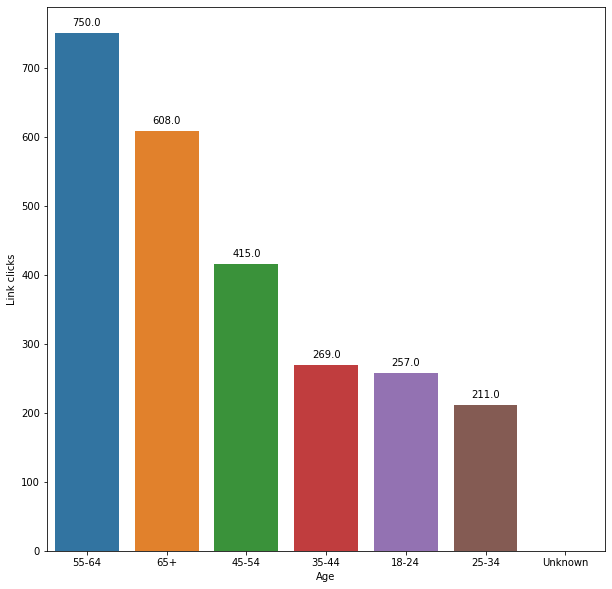

In [46]:
plt.clf()

fig, ax = plt.subplots(figsize = (10, 10))

ax1 = sns.barplot(data = df[df["Age"] != "Unknown"], x = "Age", y = "Link clicks", estimator = sum, ci = 0, order = x_order)

for value in ax1.patches:
    ax1.annotate(format(value.get_height(), ".1f"), [value.get_x() + value.get_width() / 2, value.get_height() + 10], ha = "center")

plt.show()

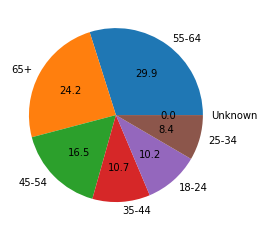

In [44]:
df_pie = df.groupby("Age")["Link clicks"].sum().reset_index().sort_values(by = "Link clicks", ascending = False).reset_index(drop = True)

plt.clf()
plt.pie(x = df_pie["Link clicks"], labels = df_pie.Age, autopct= "%.1f")

plt.show()

In [59]:
# Quiero saber que edades son mas eficientes 
# Reach / Link Clicks 

temp_df = df.groupby("Age")[["Reach", "Link clicks"]].sum().reset_index().sort_values(by = "Link clicks", ascending = False)

temp_df["Result rate"] = temp_df["Link clicks"] * 100 / temp_df["Reach"]

temp_df.sort_values(by = "Result rate", ascending = False)


,Age,Reach,Link clicks,Result rate
5,65+,19289,608.0,3.152056
4,55-64,29857,750.0,2.511974
3,45-54,19865,415.0,2.089101
2,35-44,16561,269.0,1.624298
0,18-24,18156,257.0,1.415510
1,25-34,15940,211.0,1.323714
6,Unknown,0,0.0,NaN


In [80]:
# Quiero saber que segmento de edad tiene mayor frecuencia 
# df.groupby("Age")["Frequency"].mean()

temp_df = df[df.Frequency != 0]

temp_df = temp_df.groupby("Age")["Frequency"].mean().reset_index()

impressions_df = df.groupby("Age")["Impressions"].sum().reset_index()[:-1]

temp_df["Impressions"] = impressions_df["Impressions"]

temp_df = temp_df.sort_values(by = "Frequency", ascending = False)

print(temp_df)

     Age  Frequency  Impressions
5    65+   1.189382        23421
4  55-64   1.177816        35432
1  25-34   1.161818        18035
3  45-54   1.133431        22595
2  35-44   1.128158        18823
0  18-24   1.096466        19967
